# Ван-дер-Ваальса

Находим собственные значения для v, то есть точки, в которых график пересекается с прямой p.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlibnotebooself_value
%matplotlib notebook

def self_value(p,t):
    a=np.asarray([[0, 0, 1/p], 
                  [1, 0, -3/p], 
                  [0, 1, (8*t+p)/(3*p)]])
    l, w = np.linalg.eig(a)
    return l

print(self_value(0.5,t))

def p(v, t):
    return -3/v**2 +((8/3)*t)/(v-1/3) 

[0.5783279  1.02670279 3.36830264]


In [41]:
def trapezoid(f, v1, v2, n):
    h = (v2 - v1)/n
    result = 0.5*(f(v1,t) + f(v2,t))
    for i in range(1, n):
        result += f(v1 + i*h,t)
    result *= h
    return result

С помошью дихотомии найдем давление при котором площади равны.

In [42]:
def dichotomia(f, v1, v2, eps, n):
   p_min = p(v1, t)
   p_max = p(v2,t)
   while abs(p_min-p_max)/2 > eps:
        p0 = (p_min+p_max)/2
        if (trapezoid(f, self_value(p0,t)[0], self_value(p0,t)[2], n)  - (self_value(p0,t)[2]-self_value(p0,t)[0])*p0) == 0:
            return p0
        elif (trapezoid(f, self_value(p0,t)[0], self_value(p0,t)[2], n)  - (self_value(p0,t)[2]-self_value(p0,t)[0])*p0)<0:
           p_max= p0
        else:
           p_min = p0      
   return p0

Проверим, совпадают ли эти площади.

In [43]:
def proverka(f, v1, v2, eps, n) :
    return trapezoid(f, self_value(dichotomia(f, v1, v2, eps, n),t)[0], self_value(dichotomia(f, v1, v2, eps, n),t)[2], n), (self_value(dichotomia(f, v1, v2, eps, n),t)[2]-self_value(dichotomia(f, v1, v2, eps, n),t)[0])*dichotomia(f, v1, v2, eps, n)
print(proverka(p, v1, v2, 1e-7, 1000)) 

(1.2405461648996265, 1.2405458980468347)


Построим график.

0.5588715783187319


<IPython.core.display.Javascript object>


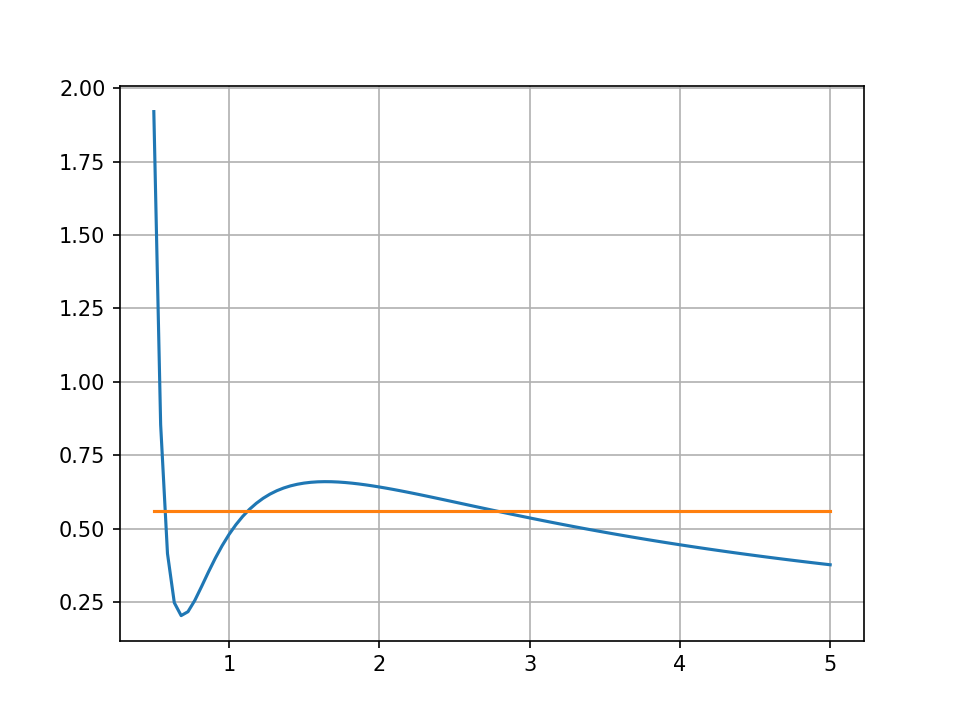

In [44]:
t = 0.87
v1 = 0.8
v2 = 1.5   
print(dichotomia(p, v1, v2, 1e-7, 1000))
v = np.linspace(0.5, 5, 100)
h = (dichotomia(p, v1, v2, 1e-5, 1000))*np.ones(100)
plt.plot(v, p(v,t))
plt.plot(v, h) 
plt.grid()
plt.show()

# Численное интегрирование

Part 1

Метод средних квадратов. Интегрируем изначальную функцию.

In [45]:
import numpy as np

def half_sqare(f, a, b, n):
	h = float(b - a)/n
	result = 0.5*(f((a+b)/2))
	for i in range(1, n):
		result += f(a + i*h)
	result *= h
	return result

def f(x):
    return 1/(np.sin(x**0.5))

n = 100
l = 1000
m = 10000

i1 = half_sqare(f, 0, ((np.pi)**2)/4, n)
i2 = half_sqare(f, 0, ((np.pi)**2)/4, l)
i3 = half_sqare(f, 0, ((np.pi)**2)/4, m)
print(i3, i2-i1, i3-i2)

3.6409373642674767 0.15569341908479917 0.04947616978629821


Добавим к исходной функции корень их х в -1 степени, чтобы избавиться от неопределенности в 0. и Чтобы не изменить интеграл добавим его же.

In [46]:
def g1(x):
    return 1/(np.sin(x**0.5))-1/np.sqrt(x)
              
def g2(x):
    return 1/np.sqrt(x)


i11 = half_sqare(g1, 0, (np.pi)**2/4, n)+half_sqare(g2, 0, (np.pi)**2/4, n)
i22 = half_sqare(g1, 0, (np.pi)**2/4, l)+half_sqare(g2, 0, (np.pi)**2/4, l)
i33 = half_sqare(g1, 0, (np.pi)**2/4, m)+half_sqare(g2, 0, (np.pi)**2/4, m)

print(i33, i22-i11, i33-i22)


3.6409373642675043 0.15569341908480183 0.04947616978632041


Видно, что во втором случае скорость сходимости увеличилась, хоть и в 12)))

Part 2

Проинтегрируем функцию с помощью полинома Лежандра.

In [48]:
import numpy as np
from scipy.special import roots_legendre
from scipy.special import roots_chebyt


def f(x):
    return (1+x**2)/np.sqrt((1-x**2))

def g(x):
    return (1+x**2)

def legendre(f, n):
    roots, weights = roots_legendre(n)
    i = np.sum(f(roots)*weights)
    return i

Заметим, что функция четная. Значит, она симметрична относительно о.у.. Можем посчитать интеграл полиномом Чебышева, а потом взять от него 1/2.

In [50]:


def chebyt(f, n):
    roots, weights = roots_chebyt(n)
    i = np.sum(f(roots)*weights)/2
    return i




Ну и просто посчитать средними прямоугольниками.

In [51]:
def half_sqare(f, a, b, n):
	h = float(b - a)/n
	result = 0.5*(f((a+b)/2))
	for i in range(1, n):
		result += f(a + i*h)
	result *= h
	return result

print(half_sqare(f, 0, 1, 1000))
print(legendre(f, 1000)/2)
print(chebyt(g, 1000))

#математика говорит 2.35619

2.2911141112941062
2.3544539797348607
2.356194490192345


Ближе всего к правильному ответу дал способ с полиномом Чебышева.